In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv(r'C:\Users\Kyle\Desktop\Middlesex uni\kirish_dataset_train\Black Friday\train.csv')
df_test=pd.read_csv(r'C:\Users\Kyle\Desktop\Middlesex uni\kirish_dataset_train\Black Friday\test.csv')

In [3]:
import pandas as pd

# Assuming df_train and df_test are your DataFrames
combined_df = pd.concat([df_train, df_test], ignore_index=True)

# Now, combined_df contains both df_train and df_test concatenated together


In [4]:
combined_df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0


In [5]:
combined_df.drop(['User_ID'], axis=1, inplace=True)

In [6]:
combined_df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [7]:
pd.get_dummies(combined_df['Gender'])

,F,M
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
783662,True,False
783663,True,False
783664,True,False
783665,True,False


In [8]:
#Handeling Categorical Feature Gender
combined_df['Gender']=combined_df['Gender'].map({'F':0,'M':1})

In [9]:
combined_df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [10]:
# handeling Categorical Feature Age
combined_df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
#pd.get_dummies(combined_df['Age'],drop_first=True)

In [12]:
combined_df['Age']=combined_df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [13]:
combined_df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0


In [14]:
city=pd.get_dummies(combined_df['City_Category'],drop_first=True).astype(int)

city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
783662,1,0
783663,1,0
783664,1,0
783665,0,1


In [15]:
df_new=pd.concat([combined_df,city], axis=1)
df_new

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN,1,0
783663,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN,1,0
783664,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN,1,0
783665,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN,0,1


In [16]:
df_new.drop('City_Category', axis=1,inplace=True)

In [17]:
df_new.head(2)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0


In [18]:
df_new.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [19]:
df_new['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [20]:
# Calculate the counts of unique values in the 'Product_Category_2' column
product_category_counts = df_new['Product_Category_2'].value_counts()

# Display the counts of unique values
print(product_category_counts)


Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64


In [21]:
df_new['Product_Category_2'].mode()[0]

8.0

In [22]:
print(df_new.columns)


Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')


In [23]:
# Fill missing values in 'Product_Category_2' column with the mode
df_new['Product_Category_2'] = df_new['Product_Category_2'].fillna(df_new['Product_Category_2'].mode().iloc[0])

# Display the updated 'Product_Category_2' column
print(df_new['Product_Category_2'])


0          8.0
1          6.0
2          8.0
3         14.0
4          8.0
          ... 
783662     8.0
783663     8.0
783664     5.0
783665    16.0
783666     5.0
Name: Product_Category_2, Length: 783667, dtype: float64


In [24]:
df_new['Product_Category_2']=df_new['Product_Category_2'].fillna(df_new['Product_Category_2'].mode())
df_new['Product_Category_2']

0          8.0
1          6.0
2          8.0
3         14.0
4          8.0
          ... 
783662     8.0
783663     8.0
783664     5.0
783665    16.0
783666     5.0
Name: Product_Category_2, Length: 783667, dtype: float64

In [25]:
df_new

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4+,1,8,8.0,NaN,NaN,1,0
783663,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,1,0
783664,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
783665,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,0,1


In [26]:
df_new['Product_Category_3']=df_new['Product_Category_3'].fillna(df_new['Product_Category_3'].mode())
df_new['Product_Category_3']

0         16.0
1         14.0
2          NaN
3          NaN
4          NaN
          ... 
783662     NaN
783663     NaN
783664    12.0
783665     NaN
783666     NaN
Name: Product_Category_3, Length: 783667, dtype: float64

In [27]:
df_new

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4+,1,8,8.0,NaN,NaN,1,0
783663,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN,1,0
783664,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
783665,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN,0,1


In [28]:
# Fill missing values in 'Product_Category_3' column with the mode
df_new['Product_Category_3'] = df_new['Product_Category_3'].fillna(df_new['Product_Category_3'].mode().iloc[0])


In [29]:
df_new

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4+,1,8,8.0,16.0,NaN,1,0
783663,P00254642,0,3,15,4+,1,5,8.0,16.0,NaN,1,0
783664,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN,1,0
783665,P00124742,0,5,1,4+,0,10,16.0,16.0,NaN,0,1


In [30]:
df_new.shape

(783667, 12)

In [31]:
df_new.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [32]:
df_new['Stay_In_Current_City_Years']=df_new['Stay_In_Current_City_Years'].str.replace('+','')

In [33]:
df_new

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4,1,8,8.0,16.0,NaN,1,0
783663,P00254642,0,3,15,4,1,5,8.0,16.0,NaN,1,0
783664,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,1,0
783665,P00124742,0,5,1,4,0,10,16.0,16.0,NaN,0,1


In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(2), int64(5), object(2)
memory usage: 65.8+ MB


In [35]:
df_new['Stay_In_Current_City_Years']=df_new['Stay_In_Current_City_Years'].astype(int)

In [36]:
df_new

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4,1,8,8.0,16.0,NaN,1,0
783663,P00254642,0,3,15,4,1,5,8.0,16.0,NaN,1,0
783664,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,1,0
783665,P00124742,0,5,1,4,0,10,16.0,16.0,NaN,0,1


In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 62.8+ MB


In [38]:
df_new

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4,1,8,8.0,16.0,NaN,1,0
783663,P00254642,0,3,15,4,1,5,8.0,16.0,NaN,1,0
783664,P00031842,0,3,15,4,1,1,5.0,12.0,NaN,1,0
783665,P00124742,0,5,1,4,0,10,16.0,16.0,NaN,0,1


In [39]:
import seaborn as sns


AttributeError: 'numpy.int64' object has no attribute 'startswith'

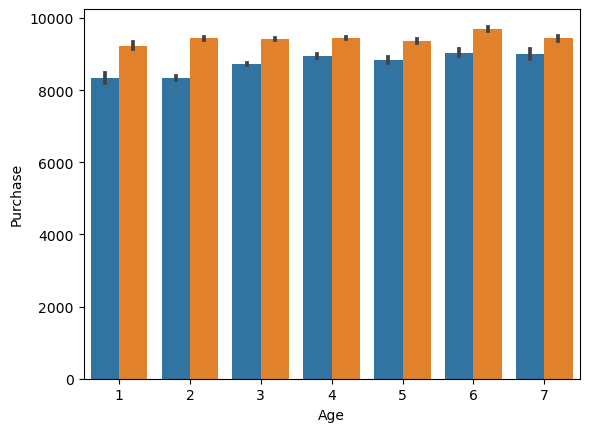

In [40]:
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df_new)


In [ ]:
# Females buy more in comparison with mens

AttributeError: 'numpy.int64' object has no attribute 'startswith'

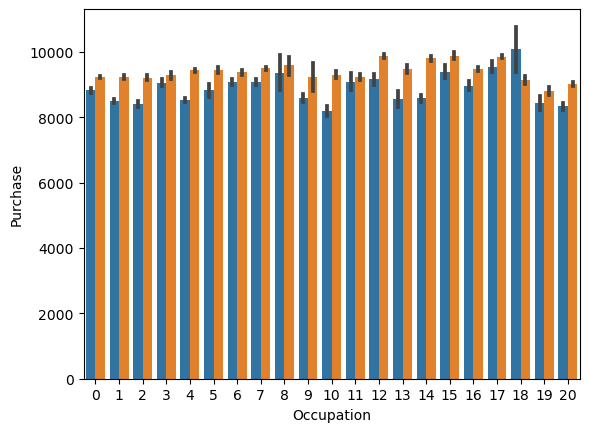

In [41]:
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df_new)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

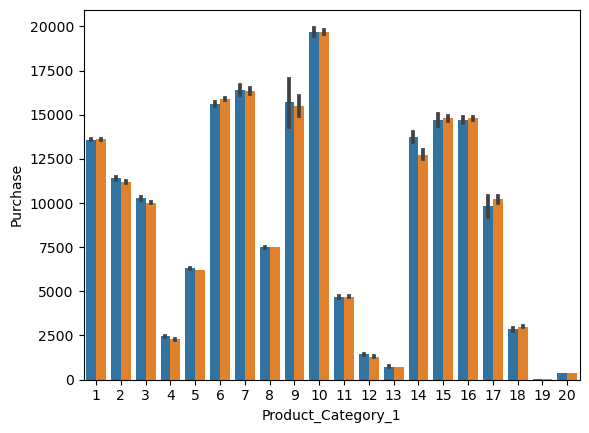

In [42]:
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df_new)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

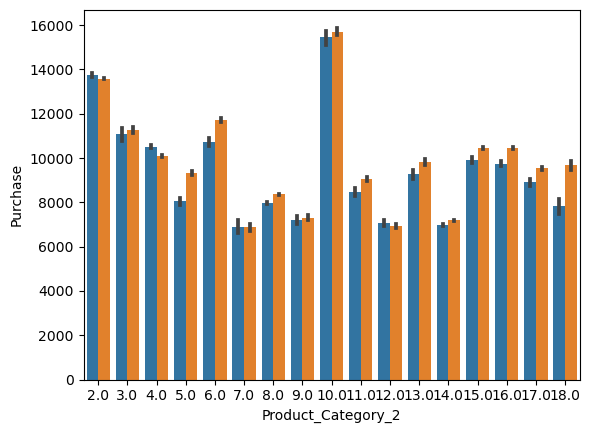

In [44]:
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df_new)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

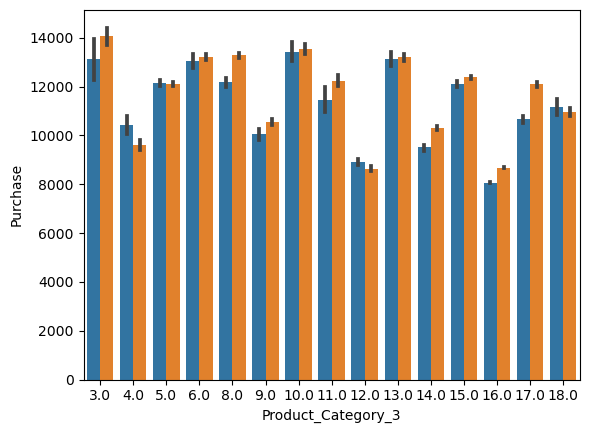

In [45]:
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df_new)


In [40]:
df_new.drop('Product_ID', axis=1, inplace=True)

In [41]:
df_new

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
783662,0,3,15,4,1,8,8.0,16.0,NaN,1,0
783663,0,3,15,4,1,5,8.0,16.0,NaN,1,0
783664,0,3,15,4,1,1,5.0,12.0,NaN,1,0
783665,0,5,1,4,0,10,16.0,16.0,NaN,0,1


In [42]:
df_test=df_new[df_new['Purchase'].isnull()]
df_test

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
550068,1,5,7,2,1,1,11.0,16.0,NaN,1,0
550069,1,3,17,0,0,3,5.0,16.0,NaN,0,1
550070,0,4,1,4,1,5,14.0,16.0,NaN,1,0
550071,0,4,1,4,1,4,9.0,16.0,NaN,1,0
550072,0,3,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...
783662,0,3,15,4,1,8,8.0,16.0,NaN,1,0
783663,0,3,15,4,1,5,8.0,16.0,NaN,1,0
783664,0,3,15,4,1,1,5.0,12.0,NaN,1,0
783665,0,5,1,4,0,10,16.0,16.0,NaN,0,1


In [43]:
df_train=df_new[~df_new['Purchase'].isnull()]
df_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,8.0,16.0,368.0,1,0
550064,0,3,1,3,0,20,8.0,16.0,371.0,0,1
550065,0,3,15,4,1,20,8.0,16.0,137.0,1,0
550066,0,7,1,2,0,20,8.0,16.0,365.0,0,1


In [50]:
X=df_new.drop('Purchase', axis=1, inplace=True)


KeyError: "['Purchase'] not found in axis"

In [ ]:
X

In [48]:
df_new['Purchase']


KeyError: 'Purchase'

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, testsize=0.33, random_state=42)

NameError: name 'X' is not defined